In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# 1. Generate a dataset with multiple predictors
X, y = make_classification(n_samples=600, n_features=6, 
                           n_informative=4, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1,
                           random_state=42)

df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 7)])
df["Target"] = y

print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target
0   0.125700  -0.190972   0.110682  -1.616677  -0.739745  -1.217255       0
1   0.496665  -3.224432   1.039395   0.574376  -1.695138  -0.082372       0
2  -0.752845  -1.924807   0.977568  -1.443545  -1.238137  -0.474574       0
3  -0.758905  -0.596231   0.181674   0.480262  -0.596655   1.364134       2
4   1.838768  -2.239916   1.304088   1.056200  -2.479613   1.471151       2


In [3]:
# 2. Define different predictor sets to compare
predictor_sets = [
    ["Feature_1", "Feature_2"],                    # Using 2 features
    ["Feature_1", "Feature_2", "Feature_3"],       # Using 3 features
    ["Feature_1", "Feature_2", "Feature_3", "Feature_4"],  # Using 4 features
    ["Feature_1", "Feature_2", "Feature_3", "Feature_4", "Feature_5", "Feature_6"]  # All features
]

results = []

In [16]:
# 3. Loop over predictor sets and evaluate logistic regression

results = []  

for predictors in predictor_sets:
    X_train, X_test, y_train, y_test = train_test_split(
        df[predictors], df["Target"], test_size=0.3, random_state=42
    )

    log_reg = LogisticRegression(solver="lbfgs", max_iter=1000)
    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append((predictors, acc))

    print(f"Predictors: {predictors}")
    print("Accuracy:", round(acc, 3))
    print(classification_report(y_test, y_pred, zero_division=0))

Predictors: ['Feature_1', 'Feature_2']
Accuracy: 0.311
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.36      0.44      0.39        59
           2       0.28      0.57      0.38        53

    accuracy                           0.31       180
   macro avg       0.21      0.34      0.26       180
weighted avg       0.20      0.31      0.24       180

Predictors: ['Feature_1', 'Feature_2', 'Feature_3']
Accuracy: 0.311
              precision    recall  f1-score   support

           0       0.42      0.07      0.12        68
           1       0.33      0.36      0.34        59
           2       0.29      0.57      0.38        53

    accuracy                           0.31       180
   macro avg       0.34      0.33      0.28       180
weighted avg       0.35      0.31      0.27       180

Predictors: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']
Accuracy: 0.511
              precision    recall 

In [17]:
# 4. Tabulate results
results_df = pd.DataFrame(results, columns=["Predictors", "Accuracy"])
results_df["Predictors"] = results_df["Predictors"].apply(lambda x: ", ".join(x))
print(results_df)

                                          Predictors  Accuracy
0                               Feature_1, Feature_2  0.311111
1                    Feature_1, Feature_2, Feature_3  0.311111
2         Feature_1, Feature_2, Feature_3, Feature_4  0.511111
3  Feature_1, Feature_2, Feature_3, Feature_4, Fe...  0.783333


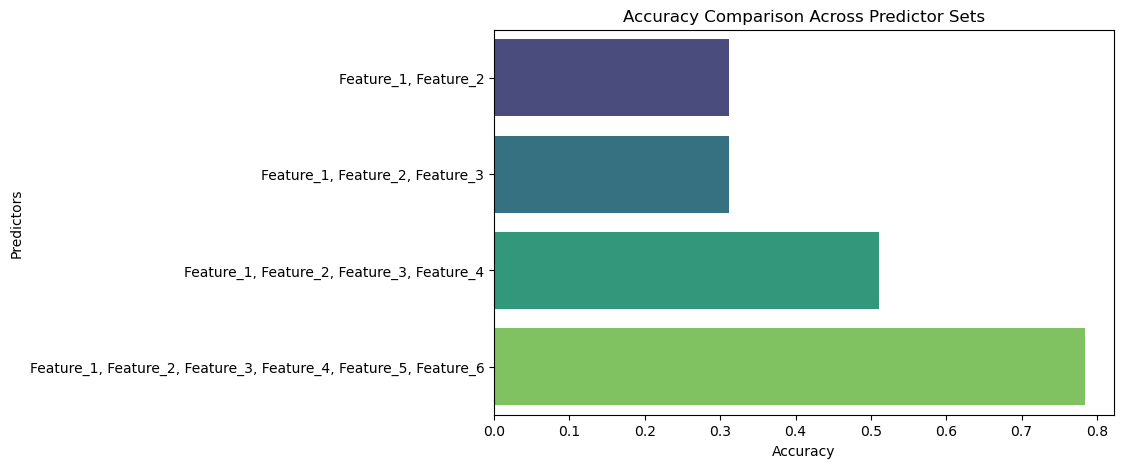

In [18]:
# 5. Visualize accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x=results_df["Accuracy"], y=results_df["Predictors"], palette="viridis", hue=results_df["Predictors"], legend=False)
plt.title("Accuracy Comparison Across Predictor Sets")
plt.xlabel("Accuracy")
plt.ylabel("Predictors")
plt.show()